In [73]:
import pandas as pd 
import seaborn as sns

In [74]:
url = 'marketing_customer_analysis_clean (3).csv'
df = pd.read_csv(url)

In [75]:
df.columns
df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


# Tasks
# Exercise 1.

In [76]:
#Hint: use the file Data_Marketing_Customer_Analysis_Round3.csv
#One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. 
#( Hint: check Dropfirst option).

In [77]:
#imports
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder

In [78]:
#retrieves the categorical and numerical data types
categoricals_df = df.select_dtypes(include='object')
numericals_df = df.select_dtypes(include='number')

In [79]:
#retrieves the categorical_df
categoricals_df

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,2011-01-17,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,2011-01-19,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,WA60547,California,No,Premium,College,2011-02-13,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [80]:
#retrieves numerical_df
numericals_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [81]:
#creates a dummy DF for the norminal_df from the categorical_df
nominal_df = pd.get_dummies(categoricals_df[["state", "response","employmentstatus","gender", "location_code", "marital_status", "policy_type", "policy", "sales_channel", "vehicle_class", "vehicle_type"]], dtype=int)

In [82]:
#add the "customer" and "effective_to_date" columns into the nominal_df 
nominal_df["customer"] = categoricals_df["customer"]
nominal_df["effective_to_date"] = categoricals_df["effective_to_date"]
nominal_df

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,customer,effective_to_date
0,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,DK49336,2011-02-18
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,KX64629,2011-01-18
2,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,1,LZ68649,2011-02-10
3,0,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,XL78013,2011-01-11
4,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,QA50777,2011-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,FE99816,2011-01-19
10906,0,0,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,KX53892,2011-01-06
10907,1,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,TL39050,2011-02-06
10908,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,WA60547,2011-02-13


In [83]:
#create ordinal-df from the categorical_df
ordinal_df = categoricals_df[["renew_offer_type", "education", "vehicle_size", "coverage"]]

In [84]:
#pass values to the ordinal_df to define hierachy
renew_offer_type = categoricals_df["renew_offer_type"].map({"Offer4": 4, "Offer3": 3, "Offer2":2, "Offer1":1})
education = categoricals_df["education"].map({"Doctor": 5, "Master": 4, "Bachelor":3, "College":2, "High School or Below":1})
vehicle_size = categoricals_df["vehicle_size"].map({"Large": 3, "Medsize": 2, "Small":1})
coverage = categoricals_df["coverage"].map({"Premium": 1, "Extended": 2, "Basic":3})
ordinal_df = pd.DataFrame()
ordinal_df["renew_offer_type"] = renew_offer_type 
ordinal_df["education"] = education 
ordinal_df["vehicle_size"] = vehicle_size 
ordinal_df["coverage"] = coverage 

#add "customer" column into the ordinal_df to keep data identifyable
ordinal_df["customer"] = categoricals_df["customer"]
ordinal_df.head()

,renew_offer_type,education,vehicle_size,coverage,customer
0,3,2,2,3,DK49336
1,4,2,2,3,KX64629
2,3,3,2,3,LZ68649
3,2,2,2,2,XL78013
4,1,3,2,1,QA50777


In [85]:
#merges all categorical columns into the categoricals_df
categoricals_df = nominal_df.merge(ordinal_df, left_on='customer', right_on='customer')

#list the columns
cols = list(categoricals_df.keys())

#removes the customer, effective_to_date columns to input them in first, second position
cols.remove("customer")
cols.remove("effective_to_date")

#puts columns/keys in first, second position
cols = ["customer","effective_to_date"]+cols

#applies the above columns order
categoricals_df = categoricals_df[cols]

#retrieves the merged categorical columns
categoricals_df

,customer,effective_to_date,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,renew_offer_type,education,vehicle_size,coverage
0,DK49336,2011-02-18,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,3,2,2,3
1,DK49336,2011-02-18,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,3,2,2,3
2,DK49336,2011-02-18,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,3,2,2,3
3,DK49336,2011-02-18,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,3,2,2,3
4,KX64629,2011-01-18,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15069,SU71163,2011-01-07,1,0,0,0,0,1,0,0,...,0,0,0,0,1,1,2,2,2,3
15070,QI63521,2011-02-24,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,1,1,2,3
15071,KX53892,2011-01-06,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,2,2,2,3
15072,TL39050,2011-02-06,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,3,2,2


In [86]:
# Dropping the "customer" column
categoricals_df.drop("customer", axis=1, inplace=True)

In [87]:
#displaying categoricals-df 
categoricals_df.head()

,effective_to_date,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,renew_offer_type,education,vehicle_size,coverage
0,2011-02-18,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,3,2,2,3
1,2011-02-18,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,3,2,2,3
2,2011-02-18,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,3,2,2,3
3,2011-02-18,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,3,2,2,3
4,2011-01-18,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,4,2,2,3


In [88]:
# Convert the 'Date' column to datetime format
#categoricals_df["effective_to_date"] = pd.to_datetime(categoricals_df["effective_to_date"])

# Extract different components of the date and create new columns
#categoricals_df['Year'] = categoricals_df['effective_to_date'].dt.year.astype(str)
#categoricals_df['Month'] = categoricals_df['effective_to_date'].dt.month_name()
#categoricals_df['Day'] = categoricals_df['effective_to_date'].dt.day.astype(str)
#categoricals_df

In [18]:
#Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, 
#which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. 
#For example, you might select customer_lifetime_value as a candidate varB which has skew.

# Exercise 2.
# 1.

In [19]:
numericals_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [20]:
scaler = MinMaxScaler()
#Begin by visually examining distributions (histograms) of the numerical features.

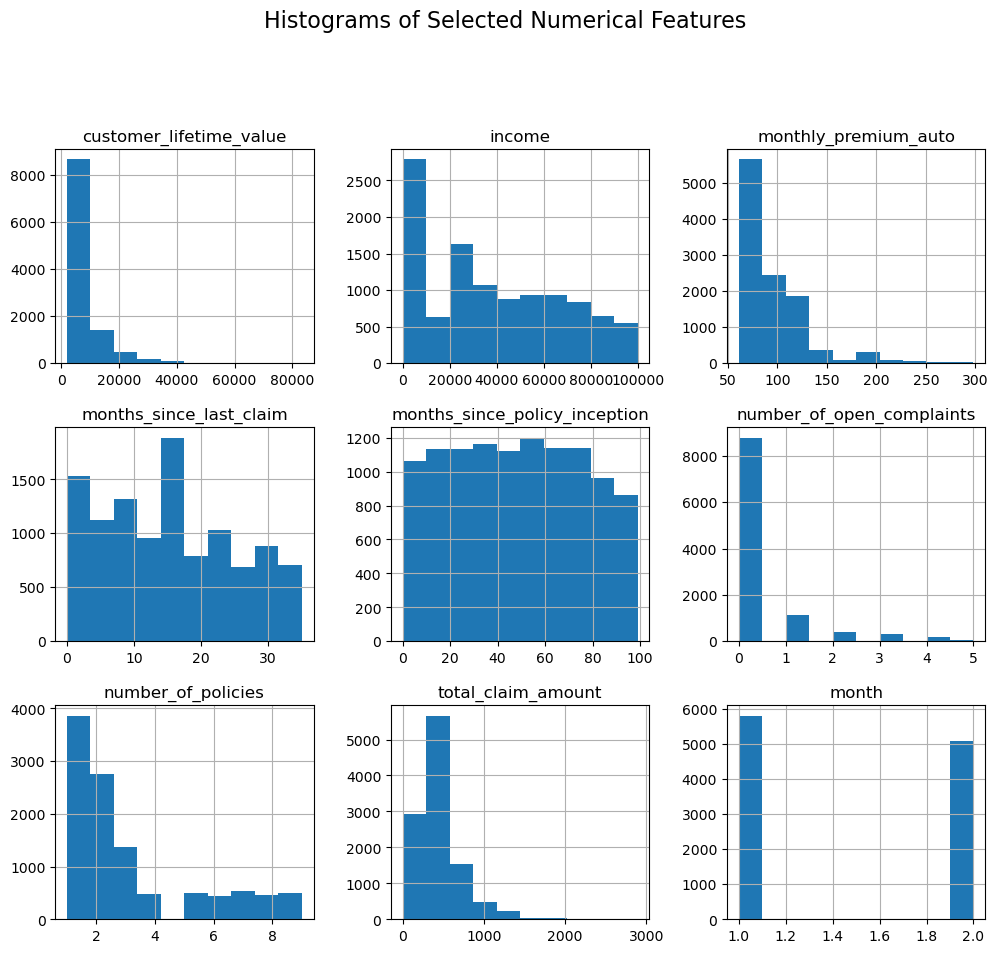

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Display histograms for specific numerical columns
selected_columns = ["customer_lifetime_value", "income", "monthly_premium_auto",
                    "months_since_last_claim", "months_since_policy_inception",
                    "number_of_open_complaints", "number_of_policies",
                    "total_claim_amount", "month"]



#.hist() is a pandas method used to plot histograms for the selected columns.
#bins=10 specifies the number of bins (intervals) for each histogram.
#figsize=(12, 10) sets the size of the overall figure to be 12 units wide and 10 units high.
#layout=(3, 3) indicates that the histograms should be arranged in a 3x3 grid (3 rows, 3 columns).
#sharex=False ensures that each subplot has its own x-axis.
numericals_df[selected_columns].hist(bins=10, figsize=(12, 10), layout=(3, 3), sharex=False)

#plt.suptitle() is a Matplotlib function used to add a centered title to the entire figure.
#The title is set to 'Histograms of Selected Numerical Features'.
#y=1.02 adjusts the vertical position of the title, placing it slightly above the default position.
#fontsize=16 sets the font size of the title to 16 points.
plt.suptitle('Histograms of Selected Numerical Features', y=1.02, fontsize=16)

#Displays the histograms
plt.show()

In [22]:
#numericals_df["income_minmax"] = scaler.fit_transform(numericals_df[["income"]])
#numericals_df["income_minmax"]
#numericals_df.income_minmax

#Select a variable, call it varA
varA = numericals_df[["income"]]

#Use minmax transform to bring varA's values into the range [0,1].
scaler = MinMaxScaler()

varA = scaler.fit_transform(varA)
numericals_df["varA"] = varA
varA

array([[0.48038127],
       [0.        ],
       [0.22143207],
       ...,
       [0.3984457 ],
       [0.64207199],
       [0.        ]])

<Axes: >

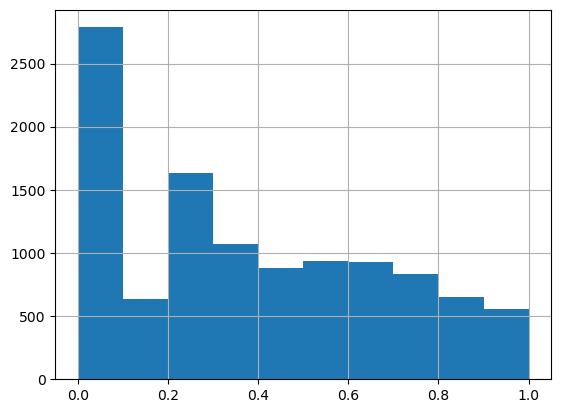

In [23]:
#Check that varA has been rescaled using a displot or a histogram
numericals_df["varA"].hist()

# 2.

In [24]:
#varB
#Use StandardScaler to standardize the variable or PowerTransform to reduce its skew.
#Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

In [25]:
#Select a variable, call it varB
varB = numericals_df[["customer_lifetime_value"]]

#Use StandardScaler to standardize the variable
scaler = StandardScaler()

varB = scaler.fit_transform(varB)
numericals_df["varB"] = varB
varB

array([[-0.46610505],
       [-0.84094593],
       [ 1.00652314],
       ...,
       [ 2.30582467],
       [ 0.5742732 ],
       [-0.16859268]])

In [26]:
pt = PowerTransformer()

<Axes: >

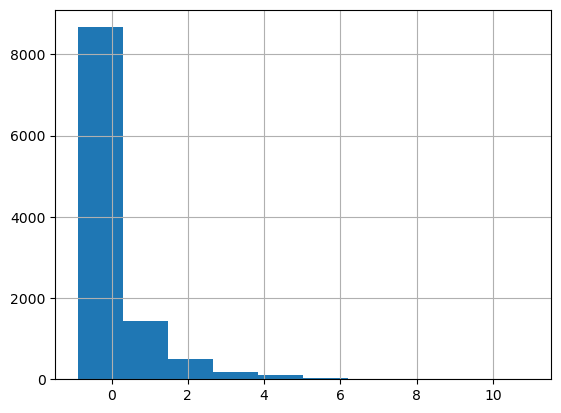

In [27]:
numericals_df.varB.hist()

In [28]:
#PowerTransform to reduce its skew.
numericals_df["varB_pt"] = pt.fit_transform(varB)

<Axes: >

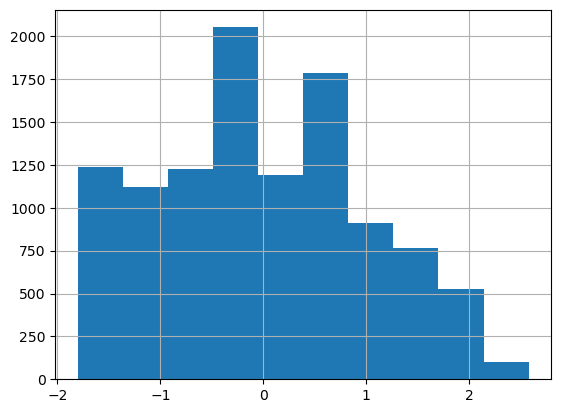

In [29]:
numericals_df["varB_pt"].hist()

In [30]:
#Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.
numericals_df.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,varA,varB,varB_pt
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,1.091000e+04,1.091000e+04
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728,0.375434,-1.426296e-16,-2.214340e-17
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915,0.303650,1.000046e+00,1.000046e+00
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000,0.000000,-8.889530e-01,-1.802957e+00
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000,0.000000,-5.815431e-01,-7.633191e-01
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000,0.338199,-3.263864e-01,-1.024201e-01
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000,0.622626,1.415499e-01,6.907578e-01
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000,1.000000,1.093823e+01,2.577099e+00


In [31]:
#scaler = StandardScaler()

In [32]:
#numericals_df.customer_lifetime_value.hist()

In [33]:
#scaler.fit_transform(numericals_df[["customer_lifetime_value"]])

In [34]:
#numericals_df["customer_lifetime_value_pt"] = pt.fit_transform(numericals_df[["customer_lifetime_value"]])

In [35]:
#numericals_df["customer_lifetime_value_pt"].hist()

In [36]:
#numericals_df.describe()